## CREDIT CARD CUSTOMER SEGMENTATION

### Day 1: Initial Data understanding

In [86]:
#removing warnings
import warnings
warnings.filterwarnings('ignore')

In [87]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
#reading dataset in a dataframe
df=pd.read_csv("data_credit_card_customer_seg.csv")

In [89]:
#inspecting the data set
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


### COLUMN DESCRIPTION
• BALANCE : Balance amount left in customers account to make purchases  
• BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1  
• PURCHASES : Amount of purchases made from account  
• PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1  
• ONEOFF_PURCHASES : Maximum purchase amount done in one-go  
• ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go  
• INSTALLMENTS_PURCHASES : Amount of purchase done in installment  
• CASH_ADVANCE : Cash in advance given by the user  
• PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done  
• CASHADVANCEFREQUENCY : How frequently the cash in advance being paid   
• CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"  
• PURCHASES_TRX : Numbe of purchase transactions made  
• CREDIT_LIMIT : Limit of Credit Card for user  
• PAYMENTS : Amount of Payment done by user  
• MINIMUM_PAYMENTS : Minimum amount of payments made by user  
• PRCFULLPAYMENT : Percent of full payment paid by user  
• TENURE : Tenure of credit card service for user  

In [90]:
#checking the number of rows and columns of the dataset
df.shape

(8950, 18)

In [91]:
#checking the statistical information of the dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Day 2: Data understanding in detail

In [92]:
#checking the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

All of the columns are numerical in nature except Customer Id column

Credit Limit and Minimum Payments have null values

In [93]:
#percentage of null values in each column of dataset
round(df.isnull().sum()*100/len(df),2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

From above calculation it is clear that only two columns Credit Limit and Minimum Payments has null values

In [94]:
#checking number of null values in each column
df.isnull().sum(axis=0)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

On seeing the above information, we find two columns with missing values **MINIMUM_PAYMENTS** and **CREDIT_LIMIT**

### Day 3: Data Preparation

#### Handling Missing values for CREDIT_LIMIT column

In [95]:
#checking the column MINIMUM_PAYMENTS
df['CREDIT_LIMIT'].head(10)

0     1000.0
1     7000.0
2     7500.0
3     7500.0
4     1200.0
5     1800.0
6    13500.0
7     2300.0
8     7000.0
9    11000.0
Name: CREDIT_LIMIT, dtype: float64

In [96]:
df[df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Since there is only one row with null Credit Limit column, we can simply remove this row from our analysis

In [97]:
#dropping the row and assigning it to different data frame
df1=df[~df['CREDIT_LIMIT'].isnull()]

In [98]:
#checking the number of null values for each column
df1.isnull().sum(axis=0)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Now we are left we only one column having null values i.e **MINIMUM_PAYMENTS**

#### Handling Missing values for MINIMUM_PAYMENTS column

In [99]:
#checking the column MINIMUM_PAYMENTS
df1[df1['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


For some rows it seems that for null value of MINIMUM_PAYMENTS, PAYMENTS column is also 0 which might suggest that the customer has not made any payment at all

Checking rows where MINIMUM_PAYMENTS is null and payments is not 0

In [100]:
#checking the above condition
df1[df1['MINIMUM_PAYMENTS'].isnull() & df1['PAYMENTS']!=0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
54,C10056,6.660517,0.636364,310.00,0.00,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
99,C10104,0.000000,0.000000,0.00,0.00,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
146,C10152,19.354559,0.909091,689.70,0.00,689.70,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,10000.0,746.691026,NaN,0.0,12
319,C10330,0.478714,0.090909,734.97,159.00,575.97,0.000000,0.833333,0.083333,0.750000,0.000000,0,16,6000.0,1159.135064,NaN,0.0,12
1155,C11198,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,29272.486070,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,C18794,3.229304,0.545455,190.20,0.00,190.20,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1500.0,295.937124,NaN,0.0,12
8593,C18827,16.887571,0.363636,1083.00,1083.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
8647,C18882,0.006651,0.142857,0.00,0.00,0.00,164.137866,0.000000,0.000000,0.000000,0.142857,1,0,1200.0,5.070726,NaN,0.0,7
8753,C18992,0.223351,0.090909,336.00,0.00,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.0,12


In [101]:
#df1[df1.isna().any(axis=1)]

In [102]:
#df1[df1['MINIMUM_PAYMENTS']==0]

In [103]:
df1['MINIMUM_PAYMENTS'].isnull().sum()

313

For rows where MINIMUM_PAYMENTS colum is Null, we impute the value 0 considering that the customer has not made any MINIMUM_PAYMENTS

In [104]:
#imputing MINIMUM_PAYMENTS column with 0 for null values
df1['MINIMUM_PAYMENTS']=df1['MINIMUM_PAYMENTS'].fillna(0)

In [105]:
df1['MINIMUM_PAYMENTS'].isnull().sum()

0

In [106]:
#checking the number of null values for each column
df1.isnull().sum(axis=0)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Checking the data types of the columns

In [107]:
df1.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [108]:
df1 = df1.drop('CUST_ID', axis=1)

The data type of the columns seem fine

### EXPLORATORY DATA ANALYSIS

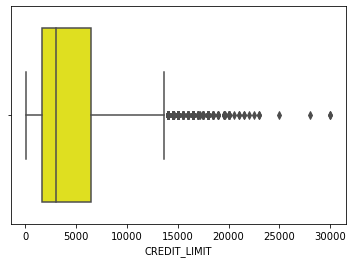

In [204]:
# visualising CREDIT_LIMIT column
sns.boxplot(df['CREDIT_LIMIT'], color='yellow') 
plt.show()

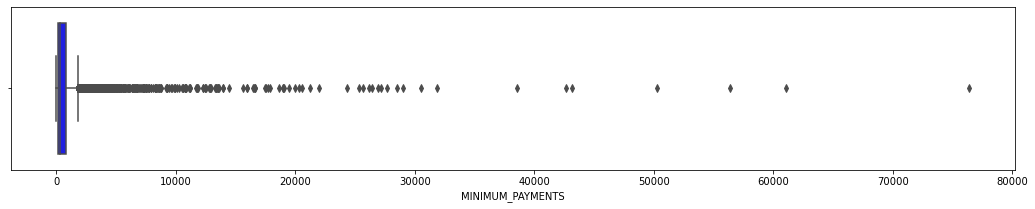

In [203]:
# Boxplot to  visualise MINIMUM_PAYMENTS
plt.figure(figsize=(18,3))
sns.boxplot(df['MINIMUM_PAYMENTS'], color='blue')
plt.show()

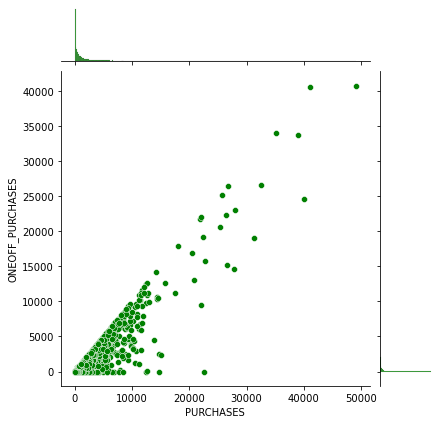

In [197]:
# Jointplot to visualize correlation between PURCHASES and ONEOFF_PURCHASES
sns.jointplot(x='PURCHASES', y='ONEOFF_PURCHASES', data=df, color='green')
plt.show()

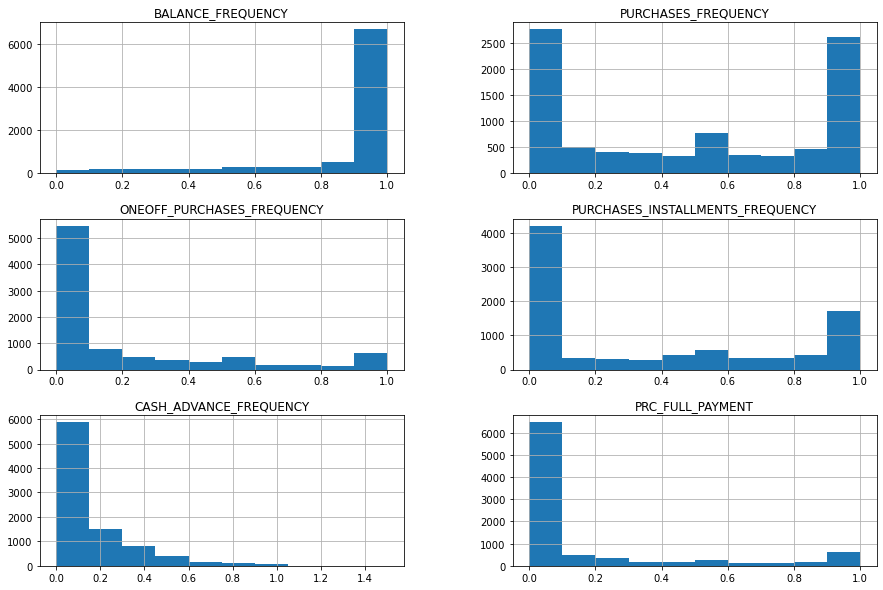

In [209]:
#visualising the Frequency variables

df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].hist(figsize=(15,10))
plt.show()

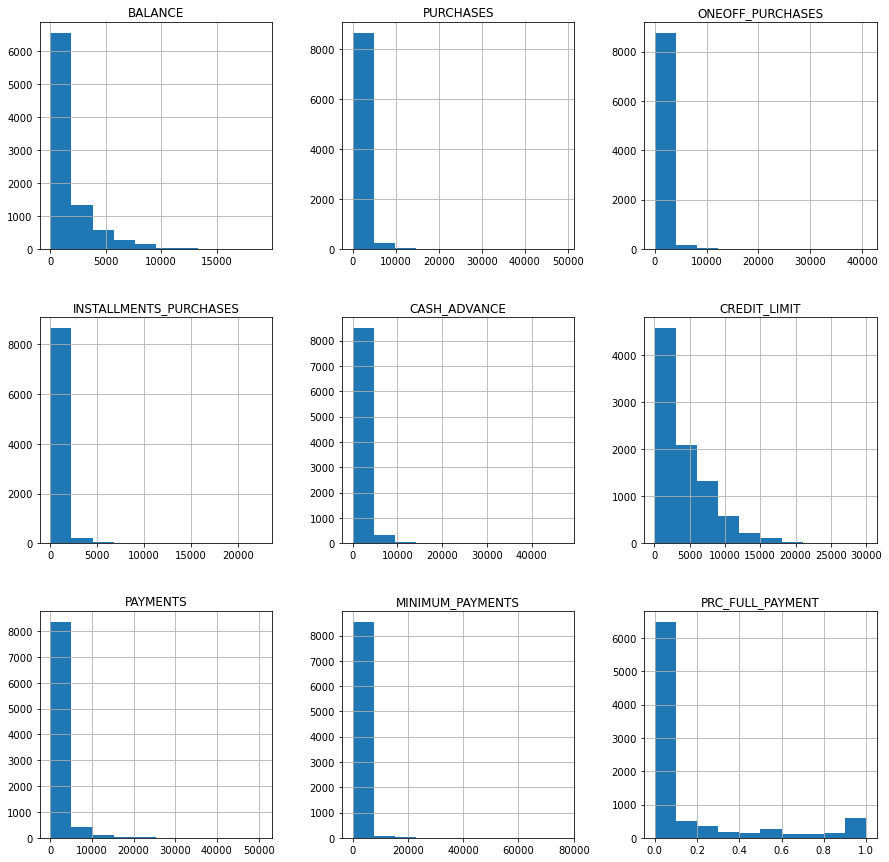

In [212]:
df[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(15,15))
plt.show()

Text(0, 0.5, 'BALANCE')

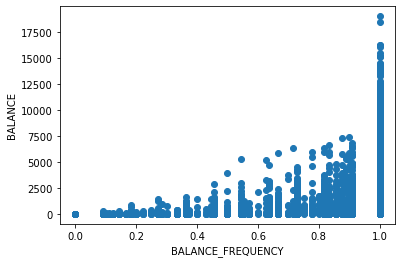

In [213]:
plt.scatter(df['BALANCE_FREQUENCY'], df['BALANCE'])
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('BALANCE')

Text(0, 0.5, 'PURCHASES')

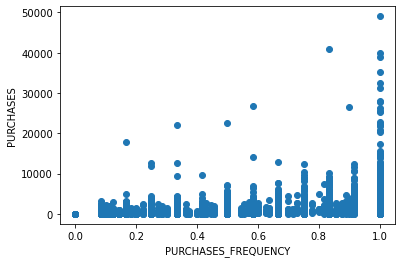

In [214]:
plt.scatter(df['PURCHASES_FREQUENCY'], df['PURCHASES'])
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES')

Text(0, 0.5, 'ONEOFF_PURCHASES')

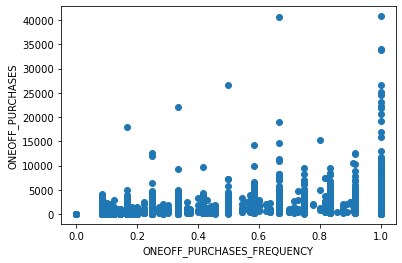

In [215]:
plt.scatter(df['ONEOFF_PURCHASES_FREQUENCY'], df['ONEOFF_PURCHASES'])
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('ONEOFF_PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE')

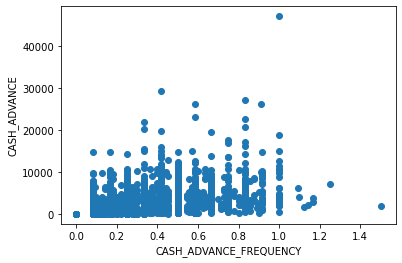

In [216]:
plt.scatter(df['CASH_ADVANCE_FREQUENCY'], df['CASH_ADVANCE'])
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('CASH_ADVANCE')

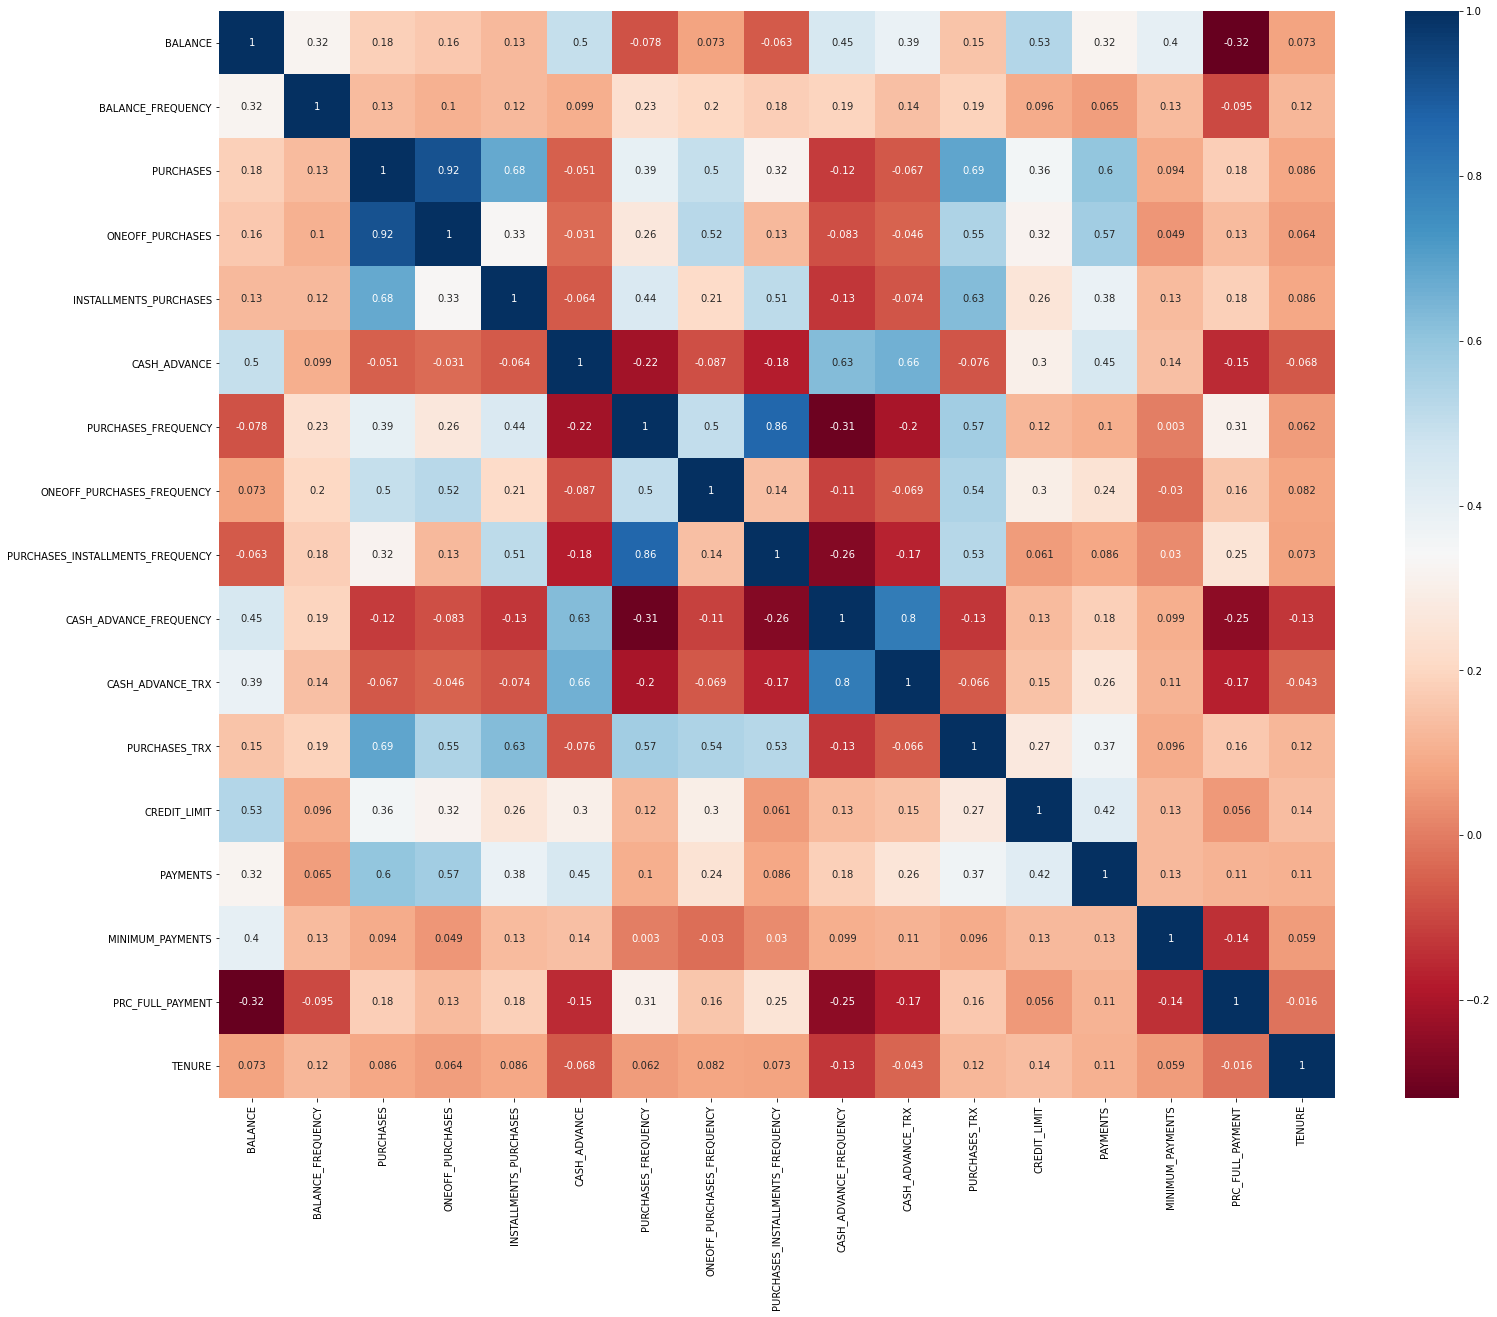

In [109]:
#checking the correlation coefficients to see which variables are highly correlated.
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

In [110]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Day 4: Feature Creation / Selection

### Data Normalisation

In [111]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [112]:
# scaling and normalizing the dataset
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

df1_normal = normalize(df1_scaled)
df1_normal = pd.DataFrame(df1_normal)

### Dimensionality Reduction using Principal Component Analysis:

PCA is a statistical procedure to convert observations of possibly correlated variables to ‘principal components’ such that:

1. They are uncorrelated with each other.
2. They are linear combinations of the original variables.
3. They help in capturing maximum information in the data set.
4. They reduce dimensionality of the dataset

In [113]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA(random_state=42)

In [115]:
# we now perform PCA to show the original Principal components
pca.fit(df1_normal)   

PCA(random_state=42)

In [116]:
#checking the list of new basis vectors or the list of Principal components of the original dataset
pca.components_  

array([[-7.56412521e-02,  4.13584255e-02,  1.93438803e-01,
         1.18256980e-01,  2.40040621e-01, -1.12814054e-01,
         5.75722455e-01,  2.46770862e-01,  5.23172358e-01,
        -2.08697712e-01, -1.24163231e-01,  2.92160279e-01,
         9.73167827e-02,  6.01102829e-02, -3.74740614e-03,
         2.17024994e-01,  1.51658327e-02],
       [ 4.45132166e-01,  2.33630643e-01,  1.36767411e-01,
         1.33825936e-01,  7.74201626e-02,  3.36644925e-01,
         3.54975874e-02,  2.27321911e-01, -2.62175815e-02,
         4.38898345e-01,  3.32675698e-01,  1.42890427e-01,
         3.62821189e-01,  2.28914999e-01,  1.44747761e-01,
        -8.48995160e-02, -4.23002036e-02],
       [-1.22466387e-01, -6.73611705e-01,  1.16229909e-01,
         1.52293268e-01, -4.96111956e-03,  7.13131744e-02,
        -1.38199010e-01,  2.29337797e-01, -2.62093185e-01,
        -4.71221437e-02, -3.50476147e-03,  2.62505091e-02,
         3.19478429e-01,  1.60942599e-01, -6.30736875e-02,
         4.21145315e-01, -1.9

In [117]:
#checking the variance of each principal component
pca.explained_variance_ratio_

array([2.90452271e-01, 1.84078150e-01, 1.10376164e-01, 1.00151138e-01,
       7.06536547e-02, 5.70259810e-02, 5.09459000e-02, 3.40216115e-02,
       2.67732255e-02, 2.06919094e-02, 1.29607719e-02, 1.23253676e-02,
       1.05912750e-02, 9.17996164e-03, 6.65471550e-03, 3.11670904e-03,
       1.19532800e-06])

**explained_variance_ratio_** for each of the PCs it tells how much variance this PC contains or explains, column with more variance will have more information

We now plot the variance ratio for each of the PCs

<BarContainer object of 17 artists>

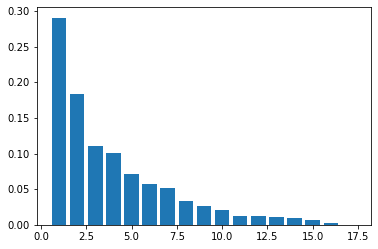

In [118]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

To check the cumulative variance explained by the Principal Components, we make the **scree plot**

In [131]:
#to calculate the cumulative Variance ratio
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.29045227, 0.47453042, 0.58490658, 0.68505772, 0.75571138,
       0.81273736, 0.86368326, 0.89770487, 0.92447809, 0.94517   ,
       0.95813078, 0.97045614, 0.98104742, 0.99022738, 0.9968821 ,
       0.9999988 , 1.        ])

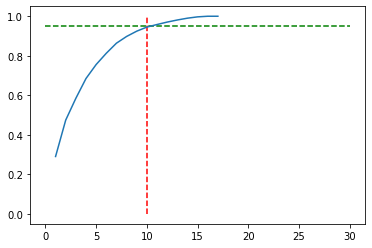

In [120]:
#plotting the Scree plot
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(range(1,len(var_cumu)+1), var_cumu)

Here against each number of components, we have the total variance explained by all the components till then.

By analysing the scree plot, we can see that at around 10 principal components, we have 95 percent of the variance being explained

Now we know how many principal components we need to explain a certain amount of variance, we finally do dimensionality reduction on our dataset using the Principal Components that we've chosen.

In [121]:
#defining PCA with 10 components
pc2 = PCA(n_components=10, random_state=42)

In [122]:
# we transform data into 10 PCs 
new_df1_normal = pc2.fit_transform(df1_normal)   

In [123]:
#converting to dataframe
new_df1_normal = pd.DataFrame(new_df1_normal)

In [124]:
#checking the PCs
new_df1_normal.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.490773,-0.679091,-0.098576,0.117267,-0.003715,-0.049334,-0.108761,0.084749,0.057789,0.011179
1,-0.518564,0.545272,0.196895,-0.203775,-0.267313,0.192198,0.030086,0.085476,-0.034471,0.458626
2,0.330870,0.269062,0.118669,0.745873,0.131514,-0.098053,0.052297,-0.363575,-0.235121,0.068206
3,-0.475751,-0.112095,0.458525,0.287627,-0.379715,-0.249878,-0.044996,-0.073971,0.123939,-0.237756
4,-0.564178,-0.480551,-0.256747,0.324520,0.027442,0.085789,0.045949,0.134975,0.023576,0.056867


In [125]:
#assigning new column names
new_df1_normal.columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10']

In [126]:
new_df1_normal.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.490773,-0.679091,-0.098576,0.117267,-0.003715,-0.049334,-0.108761,0.084749,0.057789,0.011179
1,-0.518564,0.545272,0.196895,-0.203775,-0.267313,0.192198,0.030086,0.085476,-0.034471,0.458626
2,0.330870,0.269062,0.118669,0.745873,0.131514,-0.098053,0.052297,-0.363575,-0.235121,0.068206
3,-0.475751,-0.112095,0.458525,0.287627,-0.379715,-0.249878,-0.044996,-0.073971,0.123939,-0.237756
4,-0.564178,-0.480551,-0.256747,0.324520,0.027442,0.085789,0.045949,0.134975,0.023576,0.056867


Now, we have successfully performed **Principal Component Analysis** on the dataset

We will now proceed with **DBSCAN clustering**


### Day 5:Initial Model Creation and feasilibty check

#### DBSCAN Clustering using 10 Principal Components

In [142]:
from sklearn.cluster import DBSCAN

In [141]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(new_df1_normal)
labels = dbscan.labels_
df1['cluster'] = dbscan.labels_

In [140]:
df1['cluster'].value_counts()

-1     8646
 1       80
 2       25
 6       18
 3       17
 13      13
 7       10
 25      10
 0        9
 10       9
 5        8
 4        8
 14       7
 22       7
 9        6
 17       6
 8        6
 23       6
 19       6
 12       5
 11       4
 26       4
 18       4
 15       4
 20       4
 28       4
 21       4
 24       4
 16       4
 30       4
 27       4
 29       3
Name: cluster, dtype: int64

#### DBSCAN Clustering using 5 Principal Components

In [173]:
#defining PCA with 5 components
pc3 = PCA(n_components=5, random_state=42)

In [174]:
# we transform data into 5 PCs 
new_df2_normal = pc3.fit_transform(df1_normal)  

In [175]:
#converting to dataframe
new_df2_normal = pd.DataFrame(new_df2_normal)

In [176]:
#assigning new column names
new_df2_normal.columns = ['PC1', 'PC2','PC3','PC4','PC5']

In [177]:
new_df2_normal.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.490773,-0.679091,-0.098576,0.117267,-0.003715
1,-0.518564,0.545272,0.196895,-0.203775,-0.267313
2,0.330870,0.269062,0.118669,0.745873,0.131514
3,-0.475751,-0.112095,0.458525,0.287627,-0.379715
4,-0.564178,-0.480551,-0.256747,0.324520,0.027442


In [182]:
dbscan = DBSCAN(eps=0.036, min_samples=10).fit(new_df2_normal)
labels = dbscan.labels_
df1['cluster'] = dbscan.labels_

In [184]:
df1['cluster'].value_counts()


-1     8625
 2       92
 3       60
 7       27
 0       25
 1       23
 5       17
 4       16
 8       13
 12      11
 9       11
 6       10
 11      10
 10       9
Name: cluster, dtype: int64

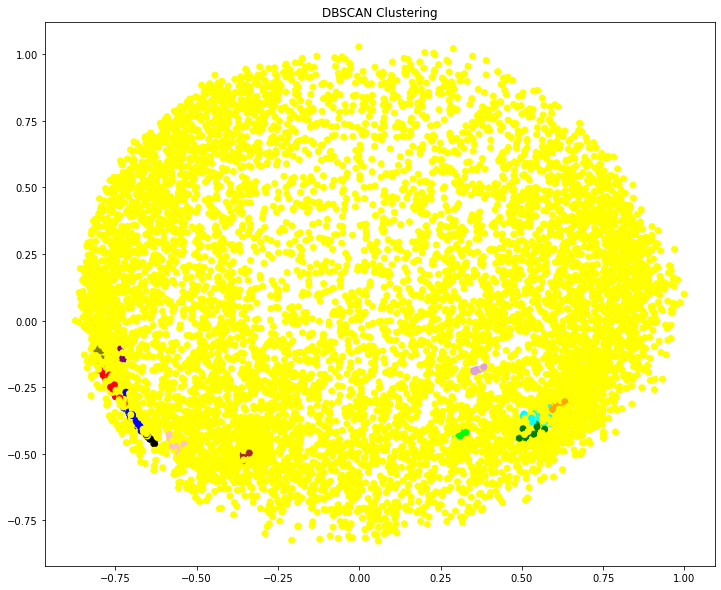

In [192]:
clusterColor = {-1: u'yellow', 1: u'green', 2: 'blue', 3: u'red', 0: u'pink', 4: u'brown', 5: u'olive', 7: u'cyan', 8: u'purple', 12: u'black', 9: u'lime', 6: u'orange', 11: u'plum', 10: u'yellow'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(new_df2_normal['PC1'], new_df2_normal['PC2'],c=colors)
plt.title("DBSCAN Clustering")
plt.show()